In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns
import cv2
import os


In [3]:
df_train = pd.read_csv('datasets/training/metadata.csv')
df_test = pd.read_csv('datasets/test/metadata.csv')
df_eval = pd.read_csv('datasets/evaluation/metadata.csv')

df_train['type'] = 'train'
df_test['type'] = 'test'
df_eval['type'] = 'eval'

df = pd.concat([df_train, df_test, df_eval])


In [11]:
df_train.head(10)


,file_name,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL,type
0,1.png,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
1,2.png,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
2,3.png,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
3,4.png,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
4,5.png,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
5,6.png,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,train
6,7.png,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,train
7,8.png,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,train
8,9.png,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,train
9,10.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train


In [5]:
# For each desease, plot the images with only this desease
def show_images(file_names):
    plt.figure(figsize=(16, 12))

    for plot_index, file_name in enumerate(file_names):
        plt.subplot(4, 4, plot_index + 1)
        image = mpimg.imread(os.path.join('datasets', 'training', file_name))
        plt.imshow(image)
        title = ""
        for desease in df_train.columns[2:]:
            if df_train[df_train['file_name'] == file_name][desease].values[0] == 1:
                title += desease + " "
        plt.title(title)
        plt.axis('off')

    plt.show()

desease_list = ['DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO',
       'TSLN', 'ERM', 'LS', 'MS', 'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP',
       'ODE', 'ST', 'AION', 'PT', 'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL',
       'RP', 'CWS', 'CB', 'ODPM', 'PRH', 'MNF', 'HR', 'CRAO', 'TD', 'CME',
       'PTCR', 'CF', 'VH', 'MCA', 'VS', 'BRAO', 'PLQ', 'HPED', 'CL']


In [ ]:
for desease in desease_list:
    file_names = df_train[df_train[desease] == 1]['file_name'].values[:4]
    show_images(file_names)


Text(0, 0.5, 'Number of images')

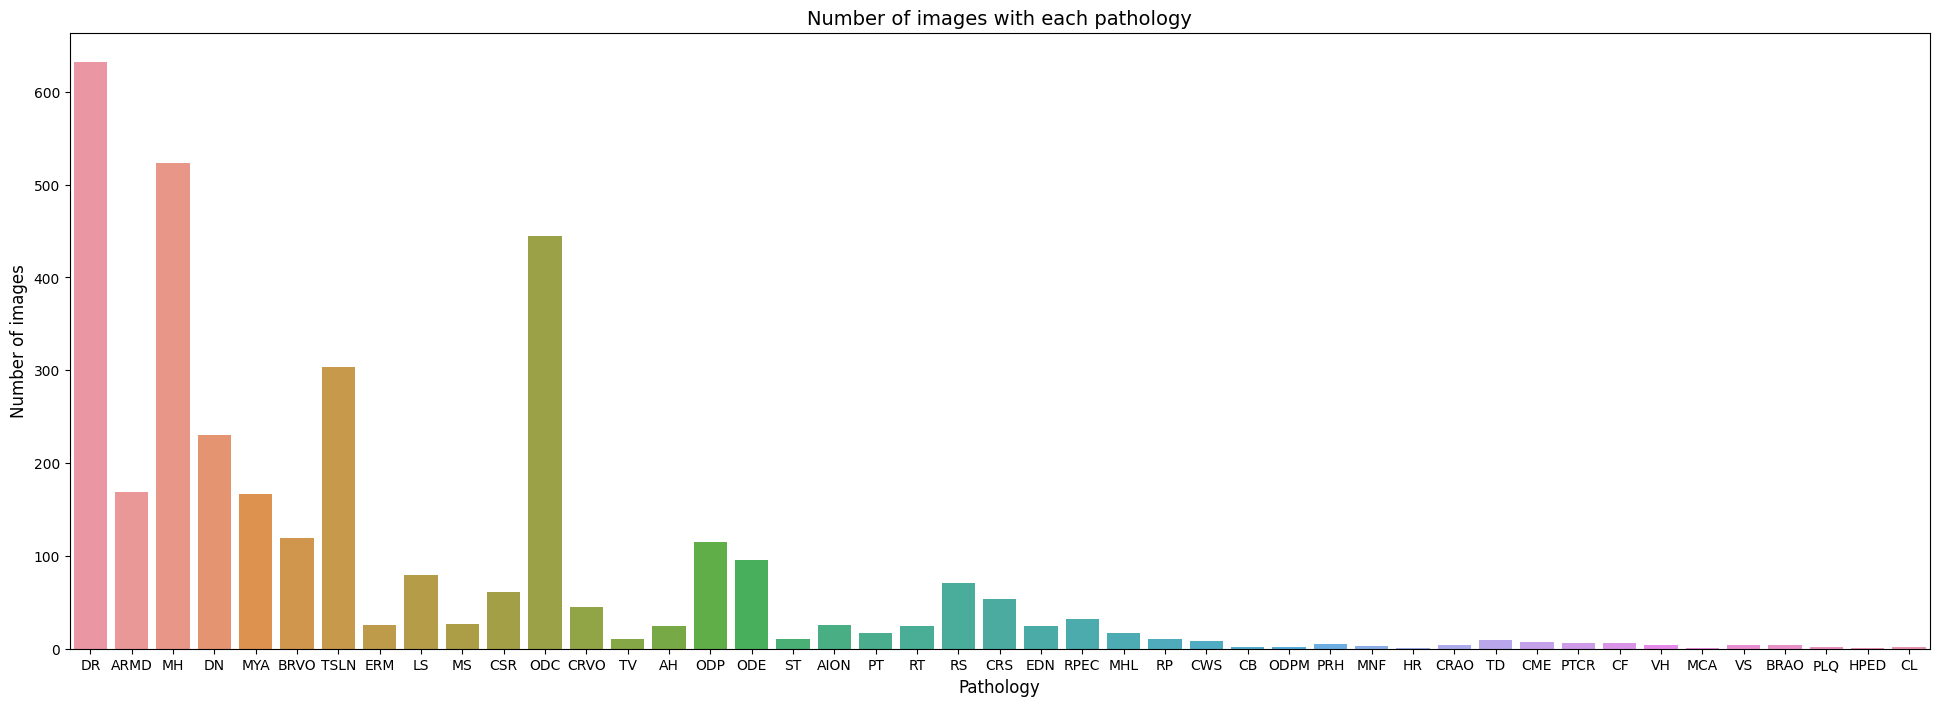

In [6]:
# Histogram of the number of images with each pathology for all the dataset (train, test and validation)
plt.figure(figsize=(24, 8))

values = df.drop(['file_name', 'Disease_Risk', 'type'], axis=1)
x = values.columns
y = values.sum().values

sns.barplot(y=y,x=x)
plt.title("Number of images with each pathology", fontsize=14)
plt.xlabel("Pathology", fontsize=12)
plt.ylabel("Number of images", fontsize=12)


<Axes: xlabel='Disease_Risk', ylabel='count'>

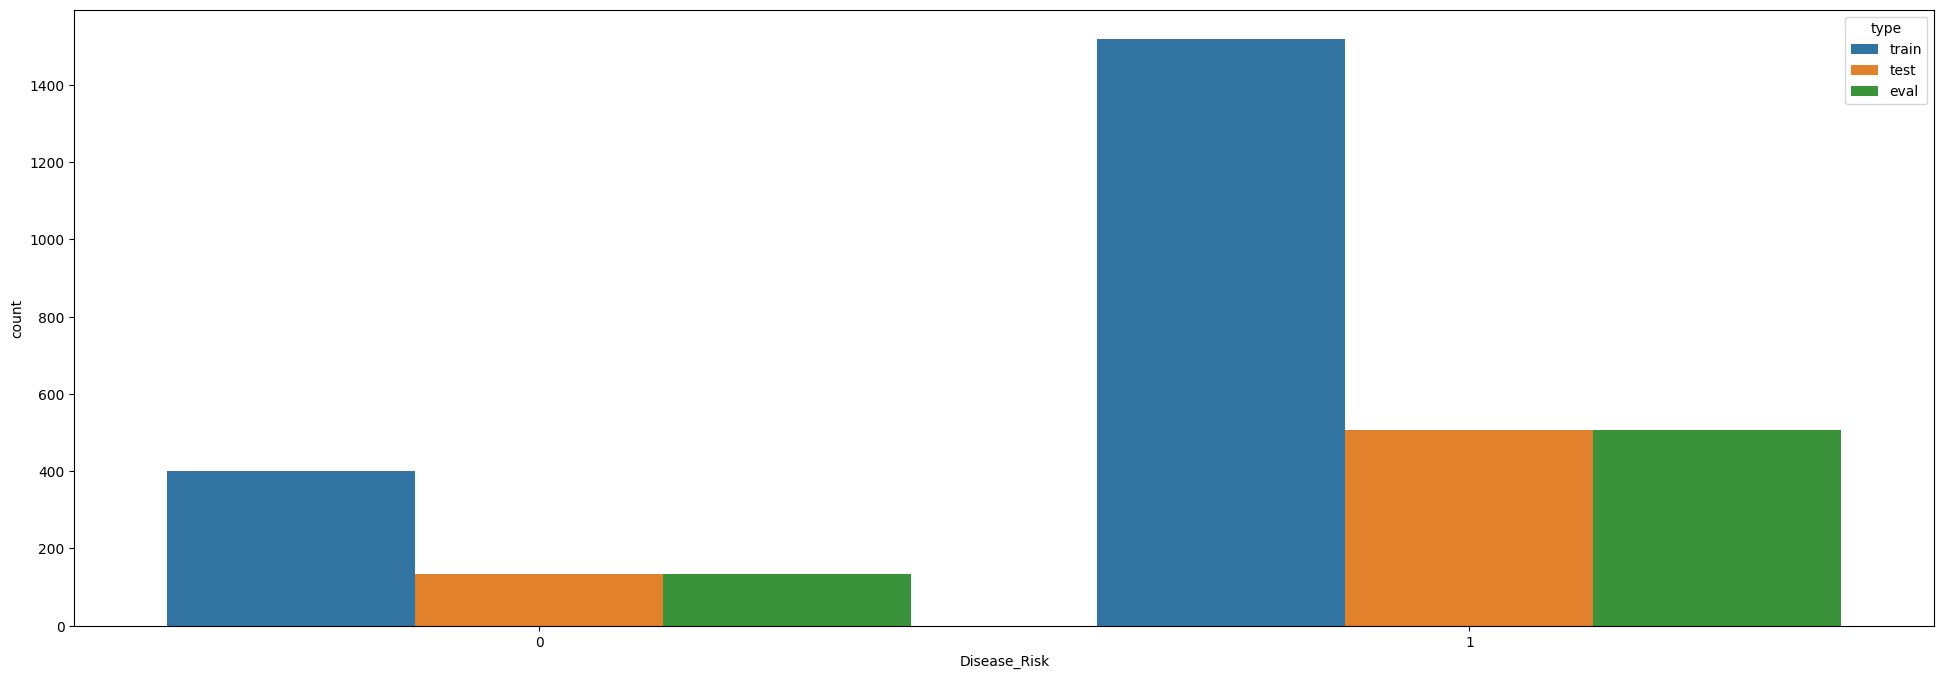

In [7]:
# Quantity of eyes with pathology vs quantity of eyes without pathology with hue for the dataset(train, test and validation)

plt.figure(figsize=(24, 8))
sns.countplot(x='Disease_Risk', hue='type', data=df)


In [9]:
# Print a list of all labels that appear more than 50 times in the train set
for desease in desease_list:
    if df_train[desease].sum() > 75:
        print(desease)


DR
ARMD
MH
DN
MYA
TSLN
ODC
